Problem 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [3]:
income = np.loadtxt("incomes.txt")

/Users/zhouanqi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


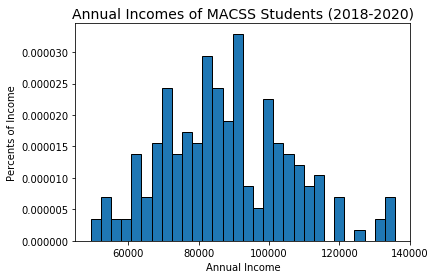

In [4]:
#a
num_bins = 30
plt.hist(income, num_bins, edgecolor='k', normed=True)
plt.title('Annual Incomes of MACSS Students (2018-2020)', fontsize=14)
plt.xlabel('Annual Income')
plt.ylabel('Percents of Income')
plt.show()

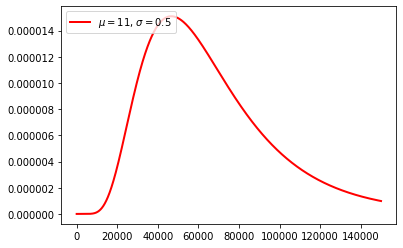

In [5]:
#b
from scipy.stats import lognorm

vec = np.linspace(1e-9, 150000, 400000)
sigma = 0.5
mu = 11
plt.plot(vec, lognorm.pdf(vec, s = sigma, scale = np.exp(mu)), linewidth = 2,\
         color = 'r', label = '$\mu=11$, $\sigma=0.5$')
plt.legend(loc='upper left')

In [6]:
def log_lik(x, mu, sigma):
    x_pdf = lognorm.pdf(x, s = abs(sigma), scale = np.exp(mu))
    value = np.sum(np.log(x_pdf))
    return value

value = log_lik(income, mu, sigma)
print("The log likelihood value of lognormal distribution is", value)

The log likelihood value of lognormal distribution is -2385.856997808558


In [7]:
#c
def crit_lr(params, *args):
    mu, sigma = params
    income = args
    neg_log_lik = - log_lik(income, mu, sigma)
    return neg_log_lik

params0 = np.array([11, 0.5])
result = opt.minimize(crit_lr, params0, args = income) #method = 'Nelder-Mead',
result

      fun: 2241.7193013573587
 hess_inv: array([[2.18365059e-04, 7.09688808e-07],
       [7.09688808e-07, 1.08153259e-04]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 80
      nit: 11
     njev: 20
   status: 0
  success: True
        x: array([11.359023  ,  0.20817732])

In [8]:
mu1, sigma1 = result.x
matrix = result.hess_inv
value1 = -result.fun
print('The maximum likelihood estimation of mu is', mu1)
print('The maximum likelihood estimation of sigma is', sigma1)
print('The value of the likelihood function is', value1)
print('The variance covariance matrix is', matrix)

The maximum likelihood estimation of mu is 11.359022999950687
The maximum likelihood estimation of sigma is 0.20817732206858106
The value of the likelihood function is -2241.7193013573587
The variance covariance matrix is [[2.18365059e-04 7.09688808e-07]
 [7.09688808e-07 1.08153259e-04]]


/Users/zhouanqi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


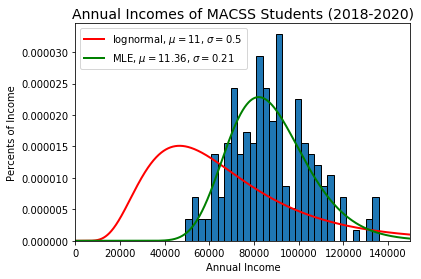

In [9]:
num_bins = 30

plt.hist(income, num_bins, edgecolor='k', normed=True)
plt.title('Annual Incomes of MACSS Students (2018-2020)', fontsize=14)
plt.xlabel('Annual Income')
plt.ylabel('Percents of Income')
plt.xlim([1e-10, 150000])

vec = np.linspace(1e-9, 150000, 400000)
sigma = 0.5
mu = 11
plt.plot(vec, lognorm.pdf(vec, s = sigma, scale = np.exp(mu)), linewidth = 2, color = 'r', \
         label = 'lognormal, $\mu=11$, $\sigma=0.5$')
plt.legend(loc='upper left')

plt.plot(vec, lognorm.pdf(vec, s = sigma1, scale = np.exp(mu1)), linewidth = 2, color = 'g', \
         label='MLE, $\mu=11.36$, $\sigma=0.21$')
plt.legend(loc = 'upper left')

In [10]:
#d
from scipy.stats import chi2

print('The log likelihood value of lognormal estimation is', value)
print('The log likelihood value of MLE estimation is', value1)
LR = 2 * (value1-value)
print('The value of likelihood ratio is', LR)
p = 1 - chi2.cdf(LR, 2)
print('The p value is', p)

The log likelihood value of lognormal estimation is -2385.856997808558
The log likelihood value of MLE estimation is -2241.7193013573587
The value of likelihood ratio is 288.2753929023984
The p value is 0.0


According to p value, we can reject H0: mu = 11, sigma =0.5.

In [26]:
#e
Pr1 = 1 - lognorm.cdf(100000, s = sigma1, scale = np.exp(mu1))
print("The probablity that I will earn more than 10000 is {:.2f}%".format(100 * Pr1))
Pr2 = lognorm.cdf(75000, s = sigma1, scale = np.exp(mu1))
print("The probablity that I will earn less than 75000 is {:.2f}%".format(100 * Pr2))

The probablity that I will earn more than 10000 is 22.99%
The probablity that I will earn less than 75000 is 26.02%


Problem2

In [28]:
#a
data = pd.read_csv('sick.txt')
data.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [38]:
import scipy.stats as sts

def log_lik2(y, x1, x2, x3, beta0, beta1, beta2, beta3, sigma):
    eps = y - beta0 - beta1*x1 - beta2*x2 - beta3*x3
    pdf = sts.norm.pdf(eps, scale = abs(sigma))
    pdf[pdf == 0] = 1e-10
    return np.log(pdf).sum()
    
def crit_rl2(params, *args):
    beta0, beta1, beta2, beta3, sigma = params
    y, x1, x2, x3 = args
    log_lik = log_lik2(y, x1, x2, x3, beta0, beta1, beta2, beta3, sigma)
    return -log_lik

beta00, beta10, beta20, beta30, sigma0 = (0.2, 0, 0.4, 0, 0.5)
params0 = np.array([beta00, beta10, beta20, beta30, sigma0])
y, x1, x2, x3 = data['sick'], data['age'], data['children'], data['avgtemp_winter']

result = opt.minimize(crit_rl2, params0, (y, x1, x2, x3))
beta0, beta1, beta2, beta3, sigma = result.x

In [44]:
print("beta0 =", beta0)
print("beta1 =", beta1)
print("beta2 =", beta2)
print("beta3 =", beta3)
print("sigma =", sigma)
print("The value of the log likelihood function is", -result.fun)
print("The variance covariance matrix is\n", result.hess_inv)

beta0 = 0.2516463829156877
beta1 = 0.012933350007034815
beta2 = 0.40050204860565164
beta3 = -0.00999167299585488
sigma = -0.0030176967336194875
The value of the log likelihood function is 876.8650462914748
The variance covariance matrix is
 [[ 9.18997461e-07  8.62748956e-09 -1.59817318e-07 -2.18626277e-08
  -2.91356030e-09]
 [ 8.62748956e-09  4.06442623e-09 -3.65928865e-08 -2.55506156e-09
   1.90046010e-10]
 [-1.59817318e-07 -3.65928865e-08  3.75334194e-07  2.31598999e-08
  -8.66376666e-10]
 [-2.18626277e-08 -2.55506156e-09  2.31598999e-08  1.97512185e-09
  -8.54603751e-11]
 [-2.91356030e-09  1.90046010e-10 -8.66376666e-10 -8.54603751e-11
   2.23602209e-08]]


In [45]:
#b
beta0_test, beta1_test, beta2_test, beta3_test, sigma_test = np.array([1, 0, 0, 0, 0.1])
log_like_test = log_lik2(y, x1, x2, x3, beta0_test, beta1_test, beta2_test, beta3_test, sigma_test)
MLE_like = -result.fun
lik_ratio = 2 * (MLE_like - log_like_test)
p2 = 1 - chi2.cdf(lik_ratio, 5)

print("The value of null hypothesis likelihood is", log_like_test)
print("The likelihood ratio is", lik_ratio)
print("The p value of H0 with 5 degrees of freedom is", p2)

The value of null hypothesis likelihood is -2253.700688042125
The likelihood ratio is 6261.131468667199
The p value of H0 with 5 degrees of freedom is 0.0


According to p value, we can see the probability of age, number of children, and average winter temperature having no effects on number of sick days is almost 0. We can reject H0: beta0 = 1, sigma = 0.01, and beta1, beta2, beta3 = 0.